___
# Ciência dos Dados - PROJETO 1

## Gabriel Heusi Pereira Bueno de Camargo


## TÍTULO DO SEU PROJETO
Diferença entre as regiões e zonas no Brasil quanto à segurança alimentar.

___
## Introdução

O núcleo urbano mostra-se cada vez mais distante da realidade rural no país, além das significativas diferenças entre as 5 regiões brasileiras. A partir disso busca-se analisar como isso se apresenta na segurança alimentar desses locais. Com uma análise aprofundada de uma ferramente do IBGE, a PNAD, é possível realizar tal comparação e filtragem de dados, para que então ao final desse processo haja uma conclusão plausível e coerente com as fontes analisadas.


___
## Análise e Resultados

In [209]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [210]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Gabriel Camargo\Documents\Insper - Engenharia\Ciência dos Dados\PNAD DOM2013\DOM2013csv


In [211]:
#Se usar o arquivo descompactado
base = pd.read_csv('DOM2013.csv',sep=',')
base09 = pd.read_csv('DOM2009.csv',sep=',')
#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [212]:
#MUDANÇA DA VARIÁVEL INICIAL QUE MOSTRA O ANO DE PESQUISA
base.V0101=base.V0101.astype("int")

In [213]:
#DEFINIÇÃO DAS REGIOES
base.loc[(base.UF<18),"REGIAO"]="NORTE"
base.loc[(base.UF>20)&(base.UF<30),"REGIAO"]="NORDESTE"
base.loc[(base.UF>30)&(base.UF<36),"REGIAO"]="SUDESTE"
base.loc[(base.UF>35)&(base.UF<44),"REGIAO"]="SUL"
base.loc[(base.UF>43)&(base.UF<54),"REGIAO"]="CENTRO-OESTE"
base.REGIAO=base.REGIAO.astype("category")

In [214]:
#VARIÁVEL QUANTITATIVA SE TORNA QUALITATIVA
base.loc[(base.V0105<2),"MORADORES"]="SOLTEIRO"
base.loc[(base.V0105>2)&(base.V0105<3),"MORADORES"]="CASAL"
base.loc[(base.V0105>3)&(base.V0105<7),"MORADORES"]="FAMÍLIA PEQUENA"
base.loc[(base.V0105>6)&(base.V0105<13),"MORADORES"]="FAMÍLIA GRANDE"
base.loc[(base.V0105>12),"MORADORES"]="FAMÍLIA ENORME"
base.MORADORES=base.MORADORES.astype("category")

In [215]:
#DIVISÃO EM ZONA RURAL E URBANA
base.loc[(base.V4105<4),"ZONA"]="Urbana"
base.loc[(base.V4105>3),"ZONA"]="Rural"
base.ZONA=base.ZONA.astype("category")

In [216]:
#CATEGORIZAÇÃO DA RENDA PER CAPITA
base.V4622=base.V4622.astype("category")
base.V4622.cat.categories=("SEM RENDIMENTO","ATÉ 0,25SM","ENTRE 0,25SM E 0,5SM","ENTRE 0,5SM E 1SM","ENTRE 1SM E 2SM","ENTRE 2SM E 3SM","ENTRE 3SM E 5SM","MAIS DE 5SM","SEM DECLARAÇÃO")

In [217]:
#DIVISAO DO TIPO DE MORADIA E DISPONBILIDADE PARA COZINHAR
base.loc[(base.V0201<3),"MORADIA"]="PERMANENTE"
base.loc[(base.V0201>1)&(base.V0201<5),"MORADIA"]="IMPROVISADA"
base.loc[(base.V0201>3),"MORADIA"]="COLETIVA"
base.MORADIA=base.MORADIA.astype("category")
#base=base[(base.MORADIA=="PERMANENTE")]
#base.V0221=base.V0221.astype("category")
#base.V0222=base.V0222.astype("category")
#base.V0221.cat.categories=("COMPLETA","SIMPLES")
#base.V0222.cat.categories=("SIMPLES","NÂO POSSUI FOGÃO")


In [218]:
#PERGUNTAS INICIAIS DE DIFICULDADE PARA SE ALIMENTAR
#base=base[(base.V2103==1)|(base.V2105==1)|(base.V2107==1)|(base.V2109==1)]
base.loc[(base.V2103==1) | (base.V2105==1) | (base.V2107==1) | (base.V2109==1),'Insegurança_Alimentar'] = 'Sim'
base.loc[(base.V2103==3) & (base.V2105==3) & (base.V2107==3) & (base.V2109==3),'Insegurança_Alimentar'] = 'Não'
base.V2103=base.V2103.astype("category")
base.V2105=base.V2105.astype("category")
base.V2107=base.V2107.astype("category")
base.V2109=base.V2109.astype("category")
#base.V2103.cat.categories=("SIM","NÃO")
#base.V2105.cat.categories=("SIM","NÃO")
#base.V2107.cat.categories=("SIM","NÃO")
#base.V2109.cat.categories=("SIM","NÃO")
#base=base[(base.V2113==1)|(base.V2115==1)|(base.V2117==1)|(base.V2121==1)]
base.V2113=base.V2113.astype("category")
base.V2115=base.V2115.astype("category")
base.V2117=base.V2117.astype("category")
base.V2121=base.V2121.astype("category")
base.V2113.cat.categories=("SIM","NÃO")
base.V2115.cat.categories=("SIM","NÃO")
base.V2117.cat.categories=("SIM","NÃO")
base.V2121.cat.categories=("SIM","NÃO")
base=base.loc[:,["V0101","REGIAO","ZONA","MORADIA","MORADORES","V4622",'Insegurança_Alimentar',"V2113","V2115","V2117","V2121"]]
base.columns=["ANO","REGIAO","ZONA","MORADIA","MORADORES","RENDA PER CAPITA",'Insegurança_Alimentar',"P5","P6","P7","P8"]
base

,ANO,REGIAO,ZONA,MORADIA,MORADORES,RENDA PER CAPITA,Insegurança_Alimentar,P5,P6,P7,P8
0,2013,NORTE,Urbana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,NORTE,Urbana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,NORTE,Urbana,PERMANENTE,SOLTEIRO,"ENTRE 0,5SM E 1SM",Não,NaN,NaN,NaN,NaN
3,2013,NORTE,Urbana,PERMANENTE,NaN,"ENTRE 0,25SM E 0,5SM",Não,NaN,NaN,NaN,NaN
4,2013,NORTE,Urbana,PERMANENTE,NaN,"ENTRE 0,25SM E 0,5SM",Não,NaN,NaN,NaN,NaN
5,2013,NORTE,Urbana,PERMANENTE,NaN,"ENTRE 0,5SM E 1SM",Não,NaN,NaN,NaN,NaN
6,2013,NORTE,Urbana,PERMANENTE,NaN,"ENTRE 0,5SM E 1SM",Não,NaN,NaN,NaN,NaN
7,2013,NORTE,Urbana,PERMANENTE,NaN,ENTRE 1SM E 2SM,Não,NaN,NaN,NaN,NaN
8,2013,NORTE,Urbana,PERMANENTE,NaN,ENTRE 2SM E 3SM,Não,NaN,NaN,NaN,NaN
9,2013,NORTE,Urbana,PERMANENTE,SOLTEIRO,ENTRE 1SM E 2SM,Não,NaN,NaN,NaN,NaN


In [219]:
writer = pd.ExcelWriter('TabelaP1.xlsx', engine='xlsxwriter')
base.to_excel(writer, sheet_name='Projeto1')
writer.save()

In [220]:
#base=base.loc[:,["P1","P2","P3","P4","V2113","V2115","V2117","V2121"]]
#base.columns=["P1","P2","P3","P4","P5","P6","P7","P8"]
#base

In [221]:
print('Pessoas que já tiveram algum tipo de problema quanto à insegurança alimentar:')
ut1 = (base.Insegurança_Alimentar.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(ut1,'\n')

Pessoas que já tiveram algum tipo de problema quanto à insegurança alimentar:
Sim    23.8
Não    76.2
Name: Insegurança_Alimentar, dtype: float64 



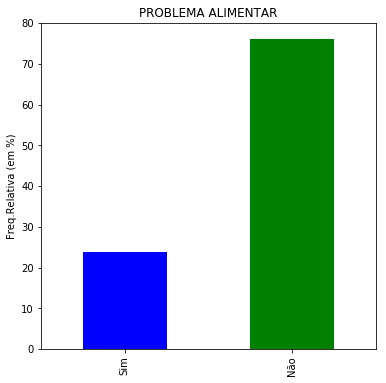

In [222]:
plot = ut1.plot(kind='bar',title='PROBLEMA ALIMENTAR',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em %)')


In [223]:
base=base[(base.P5==1)|(base.P6==1)|(base.P7==1)|(base.P8==1)]
base=base.loc[:,["ANO","REGIAO","ZONA","MORADIA","MORADORES","RENDA PER CAPITA",'Insegurança_Alimentar',"P5","P6","P7","P8"]]
base.columns=["ANO","REGIAO","ZONA","MORADIA","MORADORES","RENDA PER CAPITA",'Insegurança_Alimentar',"P5","P6","P7","P8"]

,ANO,REGIAO,ZONA,MORADIA,MORADORES,RENDA PER CAPITA,Insegurança_Alimentar,P5,P6,P7,P8


___
## Conclusão 

Descreva aqui suas conclusões!